In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [3]:
apple_df = pd.read_csv("../data/clean/Apple.csv", index_col= "Date", parse_dates=True, infer_datetime_format=True)

facebook_df = pd.read_csv("../data/clean/Facebook.csv", index_col= "Date", parse_dates=True, infer_datetime_format=True)

google_df = pd.read_csv("../data/clean/Google.csv", index_col= "Date", parse_dates=True, infer_datetime_format=True)

netflix_df = pd.read_csv("../data/clean/Netflix.csv", index_col= "Date", parse_dates=True, infer_datetime_format=True)

amazon_df = pd.read_csv("../data/clean/Amazon.csv", index_col= "Date", parse_dates=True, infer_datetime_format=True)

In [4]:
apple_df.rename(columns={"Close":"AAPL"}, inplace=True)

google_df.rename(columns={"Close":"GOOGL"}, inplace=True)

netflix_df.rename(columns={"Close":"NFLX"}, inplace=True)

facebook_df.rename(columns={"Close":"FB"}, inplace=True)

amazon_df.rename(columns={"Close":"AMZN"}, inplace=True)

In [5]:
apple_df.head()

,AAPL
Date,
2019-10-29,60.82
2019-10-30,60.82
2019-10-31,62.19
2019-11-01,63.96
2019-11-04,64.38


In [6]:
daily_prices = pd.concat([facebook_df, apple_df, amazon_df, netflix_df, google_df], axis="columns", join="inner")

daily_prices.sort_index(inplace=True)
daily_prices.head()

,FB,AAPL,AMZN,NFLX,GOOGL
Date,,,,,
2019-10-29,189.31,60.82,1762.71,281.21,1260.66
2019-10-30,188.25,60.82,1779.99,291.45,1260.70
2019-10-31,191.65,62.19,1776.66,287.41,1258.80
2019-11-01,193.62,63.96,1791.44,286.81,1272.25
2019-11-04,194.72,64.38,1804.66,292.86,1289.61


In [7]:
daily_prices.reset_index()

,Date,FB,AAPL,AMZN,NFLX,GOOGL
0,2019-10-29,189.31,60.82,1762.71,281.21,1260.66
1,2019-10-30,188.25,60.82,1779.99,291.45,1260.70
2,2019-10-31,191.65,62.19,1776.66,287.41,1258.80
3,2019-11-01,193.62,63.96,1791.44,286.81,1272.25
4,2019-11-04,194.72,64.38,1804.66,292.86,1289.61
...,...,...,...,...,...,...
248,2020-10-22,278.12,115.75,3176.40,485.23,1606.66
249,2020-10-23,284.79,115.04,3204.40,488.28,1632.98
250,2020-10-26,277.11,115.05,3207.04,488.24,1584.29
251,2020-10-27,283.29,116.60,3286.33,488.93,1598.88


In [9]:
none = daily_prices.reset_index()

fang_to_merge = none.set_index("Date")

fang_to_merge["Sum"] = fang_to_merge.sum(axis=1)
sum_fang = fang_to_merge.drop(["FB", "AAPL", "AMZN", "NFLX", "GOOGL"], axis=1)
sum_fang.to_csv("../data/clean/fang_sum.csv")

In [10]:
daily_price_change = daily_prices.pct_change()
changes_daily_prices = daily_price_change.dropna()
changes_daily_prices.head()

,FB,AAPL,AMZN,NFLX,GOOGL
Date,,,,,
2019-10-30,-0.005599,0.000000,0.009803,0.036414,0.000032
2019-10-31,0.018061,0.022525,-0.001871,-0.013862,-0.001507
2019-11-01,0.010279,0.028461,0.008319,-0.002088,0.010685
2019-11-04,0.005681,0.006567,0.007380,0.021094,0.013645
2019-11-05,-0.002054,-0.001553,-0.001635,-0.016493,0.001419


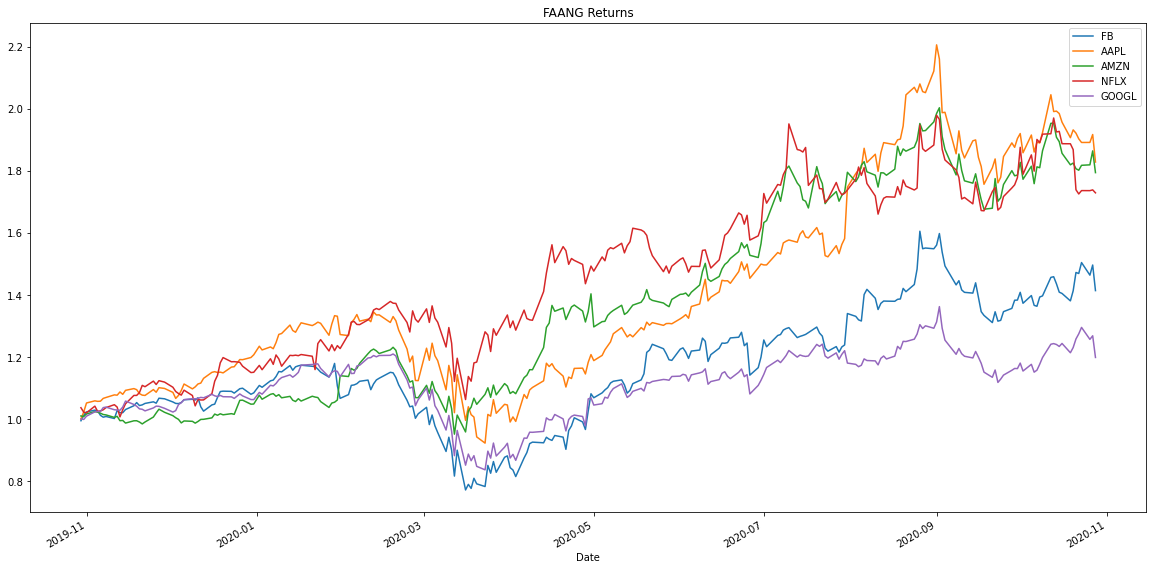

In [11]:
returns_faang = (1 + changes_daily_prices).cumprod()
returns_faang.plot(figsize = (20,10), title="FAANG Returns")

In [12]:
standard_dev = returns_faang.std()
standard_dev

FB       0.184986
AAPL     0.326597
AMZN     0.329905
NFLX     0.275714
GOOGL    0.102088
dtype: float64

In [13]:
annual_sd = standard_dev * np.sqrt(252)
annual_sd

FB       2.936568
AAPL     5.184569
AMZN     5.237081
NFLX     4.376824
GOOGL    1.620593
dtype: float64

In [14]:
weights = [.2, .2, .2, .2, .2]

portfolio_returns = returns_faang.dot(weights)

portfolio_returns.head()

Date
2019-10-30    1.008130
2019-10-31    1.012674
2019-11-01    1.023960
2019-11-04    1.035060
2019-11-05    1.030829
dtype: float64

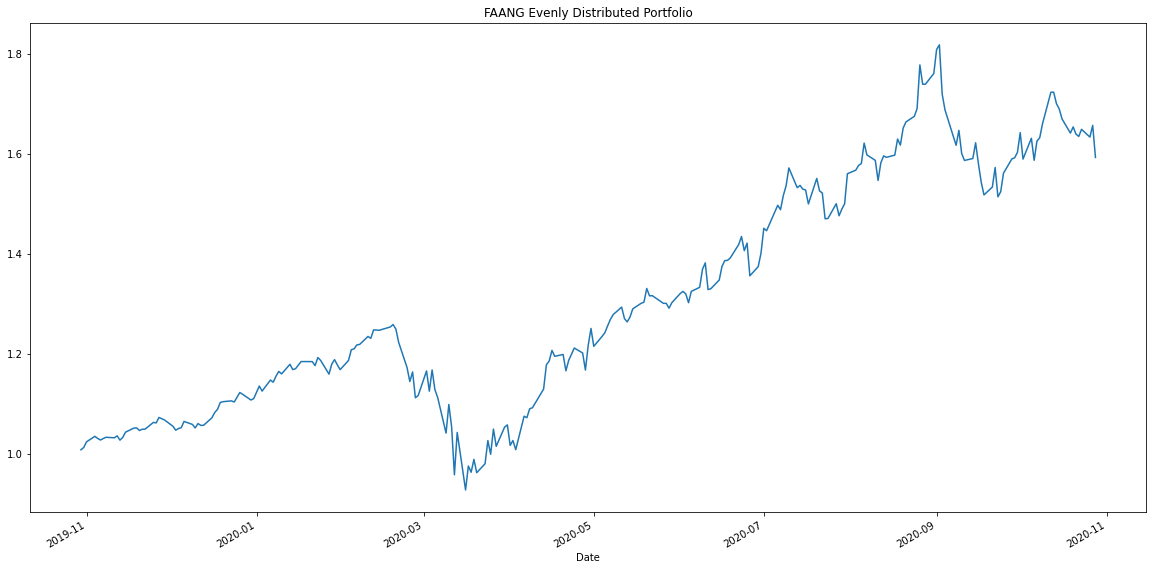

In [15]:
portfolio_returns.plot(figsize = (20,10), title="FAANG Evenly Distributed Portfolio")